In [3]:

import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score  
#auc值是表示训练准确度的，AUC越大，说明分类效果越好。
#AUC是指 随机给定一个正样本和一个负样本，分类器输出该正样本为正的那个概率值比分类器输出该负样本为正的那个概率值要大的可能性。
from datetime import date

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.head()#看一下我们读入的数据

,number,label,sequence,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130
0,1,1,">KP281294 location=1..1146,organism=Escherich...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250679
1,2,0,">AJAX01000004 location=97138..98325,organism=...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.559372
2,3,1,atgctgtcagagttcaatcgcagaactttcctcatcggatccagc....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460515
3,4,0,>COMY01000001 location=complement(209557..210...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.953283
4,5,0,gtg..............................................,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.632914


In [9]:
train = data[data['number'] < 7000]
test = data[data['number'] > 7000]

In [10]:
X_train = train[train.columns[2:]]
corpus = X_train.values.flatten().astype(str)   #把不同句子拼接成矩阵

X_train = X_train.values.astype(str)
X_train = np.array([' '.join(x) for x in X_train])
X_test = test[test.columns[2:]]
X_test = X_test.values.astype(str)
X_test = np.array([' '.join(x) for x in X_test])
y_train = train['label'].values
y_test = test['label'].values

MemoryError: 

In [7]:
corpus[:3]#看一看第三列

array([ '..........-------------------------------.MRRSV-SLLAACA-TT.....LLLGACastapasap..AGLKVTVAPVAHPAGETPqwwyrsGAAQAAANGaMAGKAKNVILFLGDGMSLTTVAASRIYEgqqkg.........GSGEENLl....SWERFPATAFSKTYNTDSQTPDSAGTMTAITTGVKTHMGAIGVSAGSRtdcadslskGLLTWLQLAD.SAGLATGVVSTARLTHATPAATYAHSPERnwendtdlteaakaAGCKDIAQQLLstsryGRGPLVALGGGRGEFTTVEERdpEYDDKVgqrldGRSLVQEWQQAhpQGAYVWNSKQL--QAAANAPA-..ILGLFEPDHM.RYEYERPqdpagePSLAELTAAAIKNLSRHQEGYVLMIEGARIDHANHSGNAYRALTETVALSDAVRVANELTSADD--TLIIVTADHS--....................HTLNFVGYPAR........GNp..........ILGKVKDKGG.........-EDGAGkldyaldgngqPYTTLSYANGPGHTGTsnqqpagpkryphnpssfePANGRPNLHDVDTE.HPDYMQEALVPMKSESHGGEDVGIWARGPGSKAIRGTLEQNAIYHMIVQATPaLRDRLCQAGTCDDKGVPVELPAPATFERKAEA--k',
       'nan', 'nan'], 
      dtype='<U2876')

In [8]:
y_train[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [9]:
X_train[:2]

array([ '..........-------------------------------.MRRSV-SLLAACA-TT.....LLLGACastapasap..AGLKVTVAPVAHPAGETPqwwyrsGAAQAAANGaMAGKAKNVILFLGDGMSLTTVAASRIYEgqqkg.........GSGEENLl....SWERFPATAFSKTYNTDSQTPDSAGTMTAITTGVKTHMGAIGVSAGSRtdcadslskGLLTWLQLAD.SAGLATGVVSTARLTHATPAATYAHSPERnwendtdlteaakaAGCKDIAQQLLstsryGRGPLVALGGGRGEFTTVEERdpEYDDKVgqrldGRSLVQEWQQAhpQGAYVWNSKQL--QAAANAPA-..ILGLFEPDHM.RYEYERPqdpagePSLAELTAAAIKNLSRHQEGYVLMIEGARIDHANHSGNAYRALTETVALSDAVRVANELTSADD--TLIIVTADHS--....................HTLNFVGYPAR........GNp..........ILGKVKDKGG.........-EDGAGkldyaldgngqPYTTLSYANGPGHTGTsnqqpagpkryphnpssfePANGRPNLHDVDTE.HPDYMQEALVPMKSESHGGEDVGIWARGPGSKAIRGTLEQNAIYHMIVQATPaLRDRLCQAGTCDDKGVPVELPAPATFERKAEA--k nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

In [10]:
corpus[:2]

array([ '..........-------------------------------.MRRSV-SLLAACA-TT.....LLLGACastapasap..AGLKVTVAPVAHPAGETPqwwyrsGAAQAAANGaMAGKAKNVILFLGDGMSLTTVAASRIYEgqqkg.........GSGEENLl....SWERFPATAFSKTYNTDSQTPDSAGTMTAITTGVKTHMGAIGVSAGSRtdcadslskGLLTWLQLAD.SAGLATGVVSTARLTHATPAATYAHSPERnwendtdlteaakaAGCKDIAQQLLstsryGRGPLVALGGGRGEFTTVEERdpEYDDKVgqrldGRSLVQEWQQAhpQGAYVWNSKQL--QAAANAPA-..ILGLFEPDHM.RYEYERPqdpagePSLAELTAAAIKNLSRHQEGYVLMIEGARIDHANHSGNAYRALTETVALSDAVRVANELTSADD--TLIIVTADHS--....................HTLNFVGYPAR........GNp..........ILGKVKDKGG.........-EDGAGkldyaldgngqPYTTLSYANGPGHTGTsnqqpagpkryphnpssfePANGRPNLHDVDTE.HPDYMQEALVPMKSESHGGEDVGIWARGPGSKAIRGTLEQNAIYHMIVQATPaLRDRLCQAGTCDDKGVPVELPAPATFERKAEA--k',
       'nan'], 
      dtype='<U2876')

In [11]:
# 停止词
from nltk.corpus import stopwords  #排除一些常重复的停止词
stop = stopwords.words('english')

# 数字
import re
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString)) 

# 特殊符号
def isSymbol(inputString):
    return bool(re.match(r'[^\w]', inputString))

# lemma
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def check(word):
    """
    如果需要这个单词，则True
    如果应该去除，则False
    """
    word= word.lower()
    if word in stop:
        return False
    elif hasNumbers(word) or isSymbol(word):
        return False
    else:
        return True

# 把上面的方法综合起来
def preprocessing(sen):
    res = []
    for word in sen:
        if check(word):
            # 这一段的用处仅仅是去除python里面byte存str时候留下的标识
            word = word.lower().replace("b'", '').replace('b"', '').replace('"', '').replace("'", '')
            res.append(wordnet_lemmatizer.lemmatize(word))
    return res

In [12]:
corpus = [preprocessing(x) for x in corpus]
X_train = [preprocessing(x) for x in X_train]
X_test = [preprocessing(x) for x in X_test]

In [13]:
print(corpus[553])
print(X_train[523])

['n', 'n']
['j', 'h', 'c', 'e', '_', 'b', 'r', 'g', 'n', 'b', 'c', 'l', 'l', 'u', 'n', 'h', 'r', 'c', 'e', 'f', 'n', 'n', 'e', 'x', 'c', 'l', 'b', 'u', 'r', 'c', 'l', 'c', 'u', 'b', 'n', 'n', 'g', 'n', 'p', 'r', 'e', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n'

In [14]:
for i in range(len(y_train)):
    label = '__label__' + str(y_train[i])
    X_train[i].append(label)

print(X_train[49])

['x', 'c', 'e', '_', 'b', 'r', 'g', 'n', 'p', 'e', 'u', 'n', 'v', 'r', 'f', 'l', 'v', 'e', 'f', 'n', 'n', 'v', 'r', 'e', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',

In [15]:
X_train = [' '.join(x) for x in X_train]

print(X_train[12])

e k v k l l f l p l l g p v h e p v l e n r q g p g g r r l g q e l r l n k p k n v l l g g g e r n e g g g f f k g l p l g q h l k k g k p v w g v k n g l g v h e n h q l e l k g l g n v e l q p l v h v r k c g p v e k c p n l e k g g k g e q l l n r p v l g g g k f e g e w q g k l r e q q r g q v l e q k p l l g l f g n p v r w e g p k h g n k p p v c p n p k r v p l q e k l l r n e k g f f l q v e g k q h n p c g q g e v l e v q k l e f r k g n l v v h h q p k p g l q l n h g v v g n e e e e h g q l r g p h n v v g l q l f k l l k n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n __label__0


In [16]:
X_test = [' '.join(x) for x in X_test]

with open('train_ft.txt', 'w') as f:
    for sen in X_train:
        f.write(sen+'\n')

with open('test_ft.txt', 'w') as f:
    for sen in X_test:
        f.write(sen+'\n')

with open('test_label_ft.txt', 'w') as f:
    for label in y_test:
        f.write(str(label)+'\n')

#Word2vec方法转化成数值

In [17]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(corpus, size=128, window=5, min_count=5, workers=4)

D:\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [18]:
model['f']

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.08942276,  0.09778892, -0.00672318, -0.22685315, -0.21476047,
       -0.24947158,  0.1650154 ,  0.34477574, -0.20085762,  0.39214283,
        0.14645201, -0.06507235,  0.11649562, -0.48406684, -0.07185948,
        0.2885251 , -0.1927741 ,  0.10044974, -0.196603  ,  0.13562821,
        0.16698004, -0.2299826 , -0.09388756, -0.00722532,  0.38770261,
       -0.25105846, -0.05894624,  0.1521108 ,  0.11910643,  0.13379496,
       -0.29244834, -0.31643817, -0.32063875,  0.0817059 ,  0.09794715,
       -0.01696612,  0.21579936,  0.03228386, -0.02197479, -0.1579227 ,
       -0.13250816,  0.09871165,  0.16331981,  0.12086672,  0.09620626,
        0.02405926, -0.27977172,  0.05906003, -0.00960919,  0.25185871,
       -0.01343884, -0.37350672,  0.28754073,  0.32349333,  0.18578142,
       -0.06751396,  0.17071724, -0.27912763,  0.22986226, -0.52865744,
       -0.3697688 , -0.18250845,  0.13157089, -0.12698095,  0.29266348,
        0.00194689,  0.19159494, -0.07767549,  0.06626888,  0.13

# 用NLP模型表达我们的X¶
接着，我们于是就可以用这个坐标，来表示我们的之前干干净净的X。
但是这儿有个问题。我们的vec是基于每个单词的，怎么办呢？
由于我们文本本身的量很小，我们可以把所有的单词的vector拿过来取个平均值：

In [19]:
# 先拿到全部的vocabulary
vocab = model.wv.vocab

# 得到任意text的vector
def get_vector(word_list):
    # 建立一个全是0的array
    res =np.zeros([128])
    count = 0
    for word in word_list:
        if word in vocab:
            res += model[word]
            count += 1
    return res/count    

In [20]:
get_vector(['h', 'f', 't', 'o', 's'])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


array([ 0.11300445, -0.09158687,  0.04464431, -0.19578659, -0.10460167,
       -0.2740262 , -0.07526124,  0.26333557, -0.29937268,  0.02504271,
        0.11858847, -0.01870878,  0.02927852, -0.33625512,  0.10749042,
       -0.23591855, -0.2601709 , -0.01973362, -0.26650251, -0.06855346,
        0.22508962, -0.31333949, -0.23345078, -0.05553293,  0.17655191,
       -0.13828836,  0.0521254 ,  0.17000256, -0.13365946,  0.05679032,
       -0.40689886, -0.33788942, -0.25883982,  0.14449059, -0.06564319,
        0.07635837,  0.22342367,  0.14258892,  0.14143052, -0.0422131 ,
       -0.11836818, -0.08724878,  0.04420408,  0.14661003,  0.07007294,
        0.10792614, -0.05701758,  0.06944096,  0.00421206,  0.23410502,
        0.0264833 , -0.30302344,  0.30104439,  0.17651536,  0.22562343,
        0.00773868,  0.07275037, -0.13198996,  0.21368781, -0.35580249,
       -0.27816633, -0.26153622,  0.11202621, -0.14397446,  0.26464423,
        0.13103029,  0.11509263,  0.0365162 , -0.03729063,  0.01

In [21]:
wordlist_train = X_train
wordlist_test = X_test

X_train = [get_vector(x) for x in X_train]
X_test = [get_vector(x) for x in X_test]

print(X_train[10])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


[ 0.0356079  -0.05902109  0.03066772 -0.08006759 -0.02152849 -0.0267349
 -0.08371989  0.09194089 -0.0693015  -0.0622132   0.07230162 -0.07452737
  0.02615936 -0.07134885  0.11608416 -0.12392858 -0.02345803 -0.0131262
 -0.02720502 -0.08902305  0.0611549  -0.15209931 -0.11143782 -0.022549
 -0.02775455 -0.07201584  0.04676583  0.04538393 -0.05455873 -0.03026038
 -0.01560907 -0.09534729 -0.14169995 -0.10940419 -0.01577904  0.06269931
  0.08838017 -0.09274282  0.02468126  0.05433056  0.05569393 -0.09249225
 -0.02976838  0.08913568  0.02257691  0.07807935  0.06709453  0.05989082
  0.07183055  0.29084116  0.03218555 -0.08826725  0.1002781   0.18833317
  0.08801194 -0.0372781   0.0767346  -0.03826152  0.01288546 -0.15505419
 -0.1699751   0.04523066  0.08557928 -0.05947657  0.11728031 -0.01665558
 -0.06747501  0.03258742 -0.03686527 -0.04328089 -0.03643513 -0.042505
 -0.06382779 -0.04347763 -0.05484242 -0.06335184 -0.00358895 -0.15587257
 -0.08390554  0.02569019  0.05839454  0.05777242 -0.09589

In [22]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

params = [0.1,0.5,1,3,5,7,10,12,16,20,25,30,35,40]
test_scores = []
for param in params:
    clf = SVR(gamma=param)
    test_score = cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc')
    test_scores.append(np.mean(test_score))

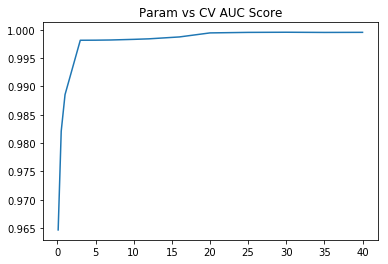

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("Param vs CV AUC Score");

用vector表示出一个大matrix，并用CNN做“降维+注意力”

In [24]:
def transform_to_matrix(x, padding_size=256, vec_size=128):
    res = []
    for sen in x:
        matrix = []
        for i in range(padding_size):
            try:
                matrix.append(model[sen[i]].tolist())
            except:
              
                matrix.append([0] * vec_size)
        res.append(matrix)
    return res

In [25]:
X_train = transform_to_matrix(wordlist_train)
X_test = transform_to_matrix(wordlist_test)

print(X_train[123])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


[[-0.28508460521698, 0.340768039226532, 0.6458675265312195, -0.5395450592041016, 0.09161821752786636, 0.04587966576218605, 0.13546685874462128, 0.3662765324115753, 0.6677958965301514, -0.00441709253937006, -0.024660887196660042, 0.16869159042835236, 0.6933708786964417, 0.6675609946250916, -0.10399793833494186, -0.07416855543851852, 0.23136445879936218, -0.8829702138900757, 0.5124818086624146, -0.2271813154220581, 0.0438491627573967, 0.05687718465924263, -0.3416733741760254, -0.03675389289855957, -0.09121766686439514, 0.34224334359169006, -0.02501789666712284, 0.2814529240131378, 0.4411323666572571, 0.24736078083515167, 0.6056939363479614, 0.4872007668018341, 0.2527477443218231, -0.5608073472976685, 0.41856685280799866, 0.22838622331619263, 0.044296037405729294, -0.8340720534324646, -0.2877444922924042, 0.5636285543441772, 0.07281433045864105, -0.1623787134885788, -0.030201228335499763, 0.19675464928150177, -0.5265089273452759, 0.6429498791694641, 1.2567157745361328, 0.18152694404125214

Matrix，它的size是 128 * 256
在进行下一步之前，我们把我们的input要reshape一下。
原因是我们要让每一个matrix外部“包裹”一层维度。来告诉我们的CNN model，我们的每个数据点都是独立的。之间木有前后关系。

In [26]:
# 搞成np的数组，便于处理
X_train = np.array(X_train)
X_test = np.array(X_test)

# 看看数组的大小
print(X_train.shape)
print(X_test.shape)

(1199, 256, 128)
(606, 256, 128)


In [27]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

print(X_train.shape)
print(X_test.shape)

(1199, 256, 128, 1)
(606, 256, 128, 1)


In [28]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import LSTM
# set parameters:
batch_size = 32
n_filter = 16
filter_length = 4
nb_epoch = 20
n_pool = 2

# 新建一个sequential的模型
model = Sequential()
model.add(Convolution2D(n_filter,filter_length,filter_length,
                        input_shape=(256, 128,1)))
model.add(Activation('relu'))
model.add(Convolution2D(n_filter,filter_length,filter_length))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))
model.add(Dropout(0.25))
model.add(Flatten())
# 后面接上一个ANN
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))


# compile模型
model.compile(loss='mse',
              optimizer='adadelta',
              metrics=['accuracy'])

Using TensorFlow backend.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (4, 4), input_shape=(256, 128,...)`
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (4, 4))`


In [29]:
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

D:\Anaconda\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Test score: 0.570957098464
Test accuracy: 0.429042904487
